In [20]:
#importing librairies
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pltp 
import string
import numpy as np


#linear and multi-linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures 

In [21]:
#importing the csv file and cleaning up our data
df = pd.read_csv('./insurance.csv')
#p = df.drop(["name","age","smoke","drink"], axis = 1)
cleanup={"sex":{'male':1,'female':0},"smoker":{'yes':1,'no':0}}
df.replace(cleanup,inplace=True)
#df= df.drop(["Unnamed: 0"], axis = 1)

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


<AxesSubplot:xlabel='charges', ylabel='Count'>

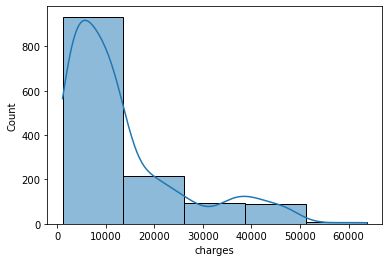

In [22]:
#show the distribution of people (feature = sex)
sns.histplot(df['charges'],bins=5,kde=True)


In [23]:
"""we plotted a histogram of how much insurance companies charge insurants to see trends and start our analysis"""

'we plotted a histogram of how much insurance companies charge insurants to see trends and start our analysis'

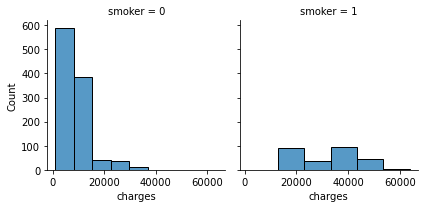

In [24]:
p = sns.FacetGrid(df,col="smoker")
p.map(sns.histplot,"charges",bins=5)

In [25]:
"""
thanks to this plot we notice that smoker are charges higher than non smokers
"""

'\nthanks to this plot we notice that smoker are charges higher than non smokers\n'

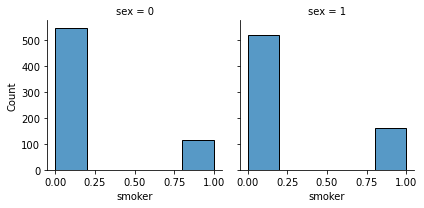

In [26]:
p = sns.FacetGrid(df,col="sex")
p.map(sns.histplot,"smoker",bins=5)

In [27]:
"""in this plot we are abole to compare the amount of people who smke and those who don't based on their sex"""

"in this plot we are abole to compare the amount of people who smke and those who don't based on their sex"

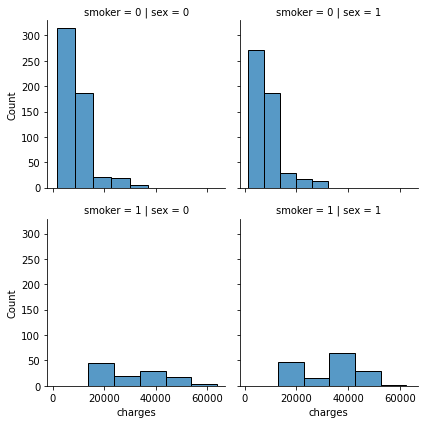

In [28]:
#this is gonna show the corralation between the person's sex and their habits (smoker or not) and  their age
p = sns.FacetGrid(df,col="sex",row="smoker")
p.map(sns.histplot,"charges",bins=5)

In [29]:
"""
and in this plot we can use both previous plots to make the conclusion that male smokers are usally the most people charged 
cuz smoker tend to get a higher fees and there are more male smokers than women 
"""

'\nand in this plot we can use both previous plots to make the conclusion that male smokers are usally the most people charged \ncuz smoker tend to get a higher fees and there are more male smokers than women \n'

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


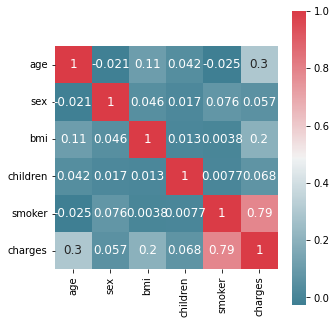

In [30]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = pltp.subplots( figsize =( 5 , 6 ) )

    cmap = sns.diverging_palette( 220 , 10, as_cmap = True )
    print(corr)

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 


        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
  
plot_correlation_map( df )    

In [31]:
"""
and thanks to a heat map we can get to the conclusion that infact there is a high correlation between smoking and the amount
insurance charge their clients but also we notice that the corralation between the number of children and charges are slightly
higher than the corralation between sex and the fee charged
"""

'\nand thanks to a heat map we can get to the conclusion that infact there is a high correlation between smoking and the amount\ninsurance charge their clients but also we notice that the corralation between the number of children and charges are slightly\nhigher than the corralation between sex and the fee charged\n'

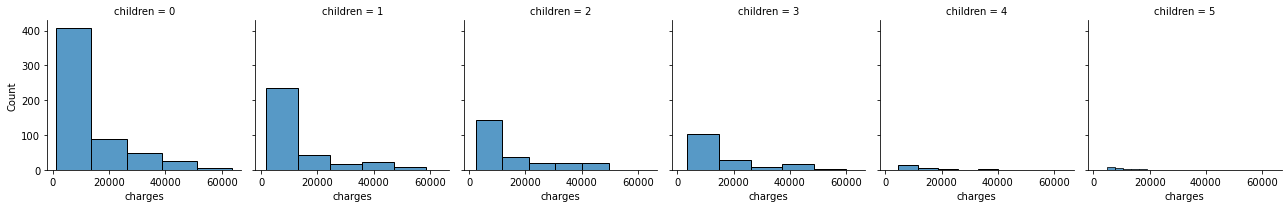

In [32]:
p = sns.FacetGrid(df,col="children")
p.map(sns.histplot,"charges",bins=5)

In [33]:
"""
with these histograms we notice that poeple with a higher number of children are usally charged more
"""

'\nwith these histograms we notice that poeple with a higher number of children are usally charged more\n'

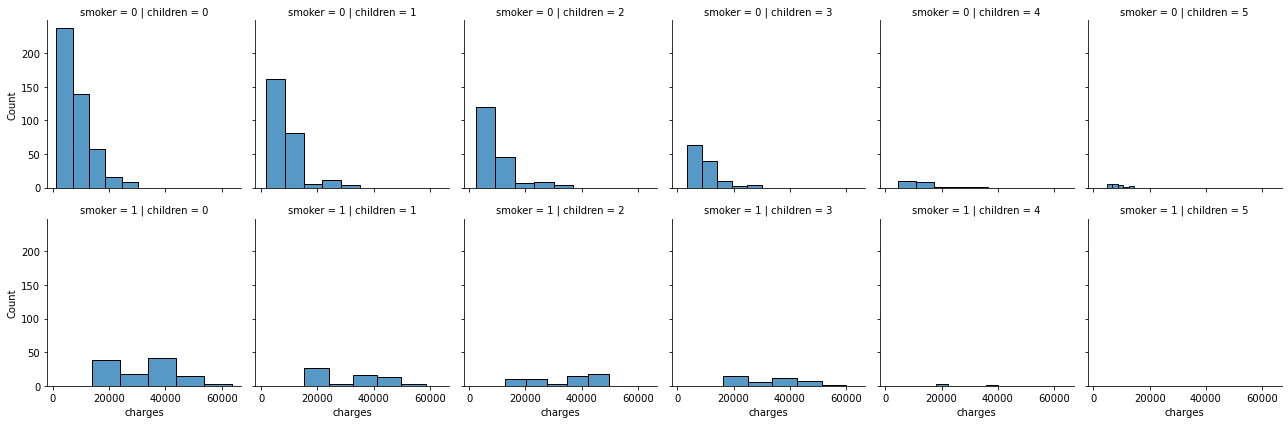

In [34]:
p = sns.FacetGrid(df,col="children",row="smoker")
p.map(sns.histplot,"charges",bins=5)

In [35]:
"""
and people who have a high number of children and do smoke have in fact a higher fee than non smokers  
"""

'\nand people who have a high number of children and do smoke have in fact a higher fee than non smokers  \n'

<AxesSubplot:xlabel='children', ylabel='Count'>

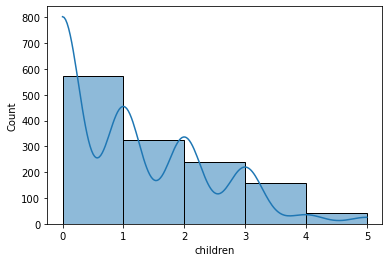

In [36]:
sns.histplot(df['charges'],x=df['children'],bins=5,kde=True)

In [42]:
x = df['smoker'].values[:,np.newaxis]
y = df['charges'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)

print("Mean squared error: ",mean_squared_error(y_test,predicted))
print("R squared: ",metrics.r2_score(y_test,predicted))

Mean squared error:  50893942.87074217
R squared:  0.6488338126992956


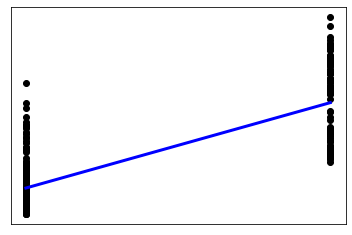

In [43]:
#plotting linear regression

pltp.scatter(x_test, y_test, color="black")
pltp.plot(x_test, predicted, color="blue", linewidth=3)

pltp.xticks(())
pltp.yticks(())

pltp.show()

Mean squared error:  50893942.87074217
R squared:  0.6488338126992956


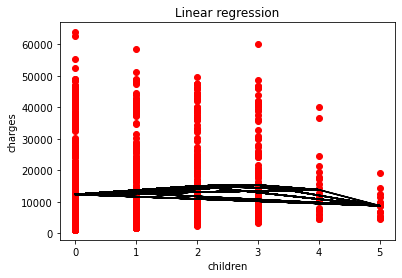

In [64]:
x= df["children"].values.reshape(-1,1)
y= df["charges"].values
poly = PolynomialFeatures(degree = 5) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

MSE_PR = mean_squared_error(y_test,predicted)
RS_PR = metrics.r2_score(y_test,predicted)

MSE_MLR = mean_squared_error(y_test,predicted)
RS_MLR = metrics.r2_score(y_test,predicted)
print("Mean squared error: ",MSE_PR)
print("R squared: ",RS_PR)

pltp.scatter(x, y, color="r")
pltp.title("Linear regression")
pltp.ylabel("charges")
pltp.xlabel("children")
pltp.plot(x, lg.predict(poly.fit_transform(x)), color="k") 